In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

1. Загрузите изображение cat_1.jpg. Отобразите изображение. Выведите размер изображения, затем пропорционально измените размер изображения и еще раз выведите результат. (3 балл)

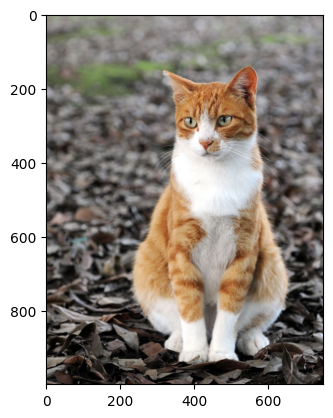

In [8]:
img1 = cv.imread('cat_1.jpg')
img1_rgb = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
plt.imshow(img1_rgb)

In [3]:
print('Длина изображения в пикселях: ', img1_rgb.shape[0])
print('Ширина изображения в пикселях: ', img1_rgb.shape[1])

Длина изображения в пикселях:  1000
Ширина изображения в пикселях:  750


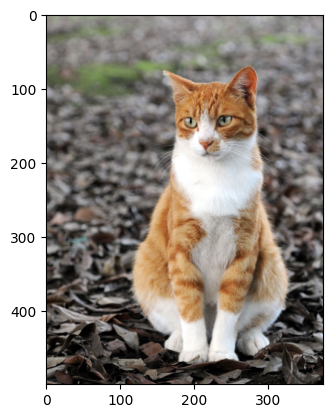

In [9]:
def resize_img(img, scale=0.5):
    w = round(img.shape[1] * scale)
    h = round(img.shape[0] * scale)

    resized = cv.resize(img, (w,h))

    return resized

resized_cat = resize_img(img1_rgb)
plt.imshow(resized_cat)

In [5]:
print('Длина уменьшенного изображения в пикселях: ', resized_cat.shape[0])
print('Ширина уменьшенного изображения в пикселях: ', resized_cat.shape[1])

Длина уменьшенного изображения в пикселях:  500
Ширина уменьшенного изображения в пикселях:  375


2. Загрузите изображение cat_1.jpg. Нарисуйте пустой синий прямоугольник вокруг лиц кошки и отобразите изображение. Сохраните изображения в cat_2.jpg (6 балл)

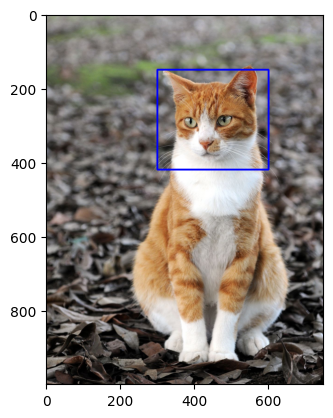

In [10]:
cat_with_rect = img1_rgb.copy()
cv.rectangle(cat_with_rect, (300,150), (600, 420), (0,0,255), 3)
plt.imshow(cat_with_rect)

In [11]:
# Переводим изображение обратно в GBR формат для корректного сохранения
cat_2 = cv.cvtColor(cat_with_rect, cv.COLOR_RGB2BGR)
cv.imwrite('cat_2.jpg', cat_2)

True

3. Преобразуйте изображение cat_1.jpg в цветовое пространство в HSV и отобразите изображение.(6 балл)

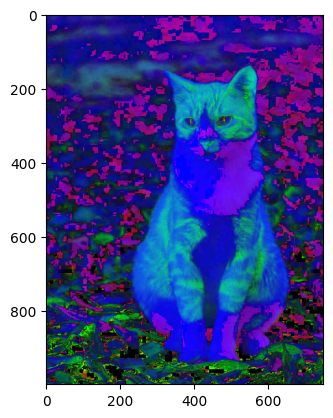

In [12]:
cat_1_hsv = cv.cvtColor(img1, cv.COLOR_BGR2HSV)
plt.imshow(cat_1_hsv)

4. Создайте программу, которая считывает видео с video.mp4 и покажите видео.  (7 балл)

In [13]:
video = cv.VideoCapture('video.mp4')

while True:
    ret, frame = video.read()
    cv.imshow('Video', frame)

    if cv.waitKey(1) & 0xFF == ord('q'):
        break

video.release()
cv.destroyAllWindows()

5. Загрузите изображение photo2.jpg. Написать программу, которая выделяет на всех фигурах контур. (8 балл)

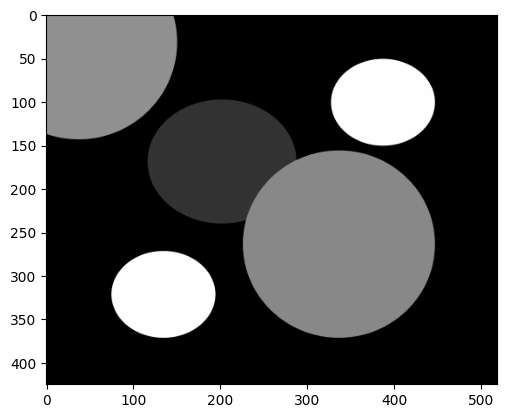

In [14]:
img2 = cv.imread('photo2.jpg')
gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

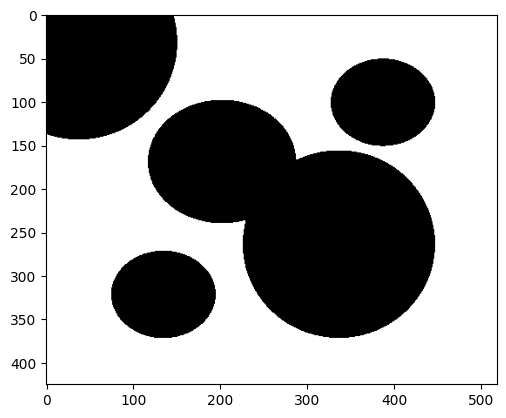

In [15]:
_, thresh = cv.threshold(gray, 30, 255, cv.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray')

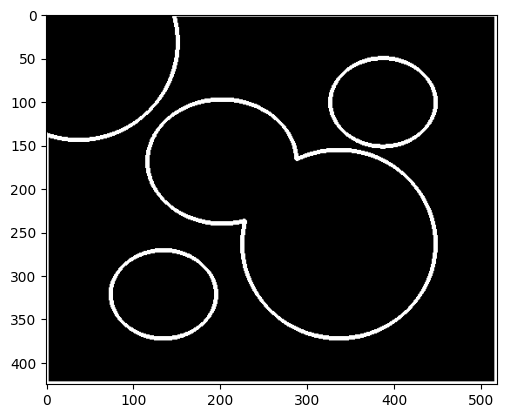

In [16]:
blank = np.zeros(gray.shape)

contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

cv.drawContours(blank, contours, -1, (255,255,255), 3)

plt.imshow(blank, cmap='gray')

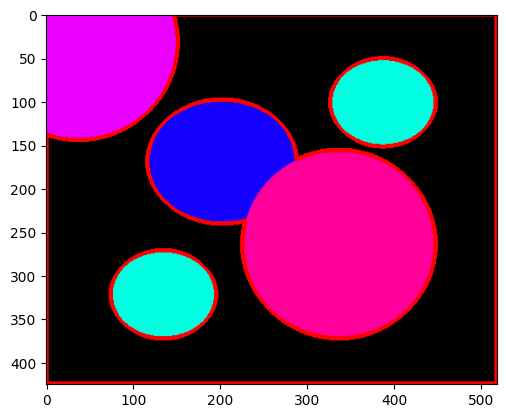

In [17]:
img2_rgb = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
cv.drawContours(img2_rgb, contours, -1, (255,0,0), 3)

plt.imshow(img2_rgb)

6. Загрузите изображение clock3.jpg. Обнаружить часы в изображений с помощью каскада (8 балл)

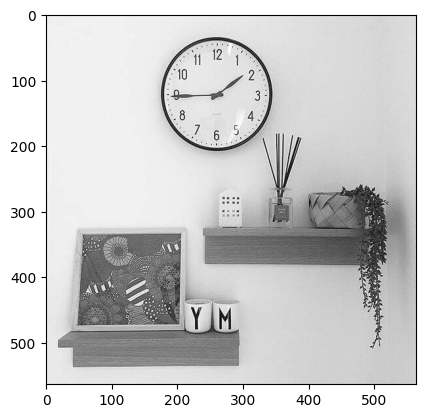

In [18]:
clock_img = cv.imread('clock3.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(clock_img, cmap='gray')

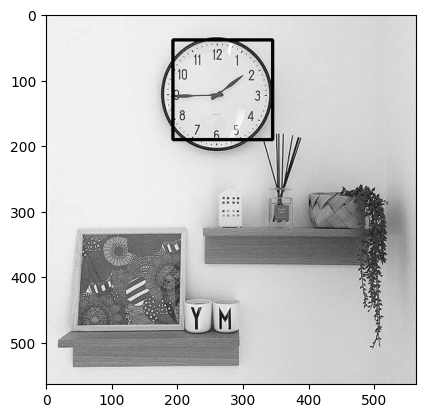

In [19]:
cascade = cv.CascadeClassifier('haarcascade_wallclock.xml')
clock_detector = cascade.detectMultiScale(clock_img, scaleFactor=1.5, minNeighbors=3)

for (x,y,w,h) in clock_detector:
    cv.rectangle(clock_img, (x,y), (x+w, y+h), (0,0,0), 3)

plt.imshow(clock_img, cmap='gray')